In [1]:
from Graph import Graph

<h1>
    From 12 matrix
<h1>

In [1]:
# from Graph import *

matrix_file = "task4/matrix_t4_010.txt"
import time
g = Graph(matrix_file, "-m")



# print(g._Graph__adjacency_matrix)


NameError: name 'Graph' is not defined

In [2]:
# from Graph import *

matrix_file = "task4/matrix_t4_010.txt"

g = Graph(matrix_file, "-m")

    

g.get_graph()


NameError: name 'Graph' is not defined

<h1>
    From 13 list
<h1>

In [7]:
list_file = 'task4/list_of_adjacency_t4_005.txt'

g = Graph(list_file, '-l')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()
# g = Graph(matrix_file, "-m")
# g.get_graph()

FileNotFoundError: [Errno 2] No such file or directory: 'task4/list_of_adjacency_t4_005.txt'

<h1>
    From 1 edge
<h1>

False


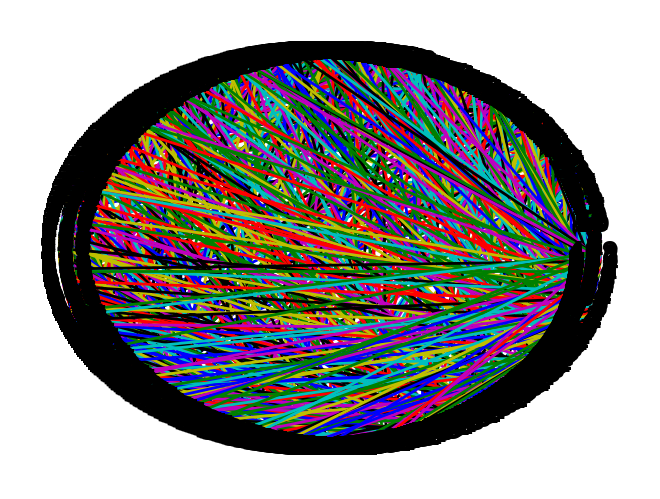

In [8]:
edge_file = 'task4/list_of_edges_t4_010.txt'
g = Graph(edge_file, '-e')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()


print(g.is_directed())
